In [1]:
import json
import numpy as np
import random
from pysidt import MultiEvalSubgraphIsomorphicDecisionTree, Node, Datum
from pysidt.decomposition import atom_decomposition_noH
from pysidt.plotting import plot_tree
from molecule.molecule import *

In [2]:
with open("../pysidt/data/rmgdbH298CHOstablenoringnoads.json",'r') as f:
    data = json.load(f)

In [3]:
training_data = []
for i,x in enumerate(data):
    d = Datum(Molecule().from_adjacency_list(x[0],check_consistency=True),x[1])
    dup = False
    for td in training_data:
        if td.mol.is_isomorphic(d.mol):
            dup = True
            break
    if not dup:
        training_data.append(d)

In [4]:
random.shuffle(training_data)
len(training_data)

184

In [5]:
train = training_data[:150]
test = []
test = training_data[150:]

In [6]:
root = Group().from_adjacency_list("""1 * R u0 px cx""")

sidt = MultiEvalSubgraphIsomorphicDecisionTree(atom_decomposition_noH,root_group=root,
                                               r=[ATOMTYPES[x] for x in ["C","O"]],
                                               r_bonds=[1,2,3,1.5],
                                                         r_un=[0],
                                              fract_nodes_expand_per_iter=0.1,
                                              )


In [7]:
sidt.generate_tree(data=train,test=test,max_nodes=4)

/Users/mjohns9/mambaforge/envs/pynta_env/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 30.587077423209106 kcal/mol
ERROR:root:test MAE: 34.272893550611784 kcal/mol
ERROR:root:# nodes: 1
/Users/mjohns9/code/PySIDT/pysidt/sidt.py:375: RuntimeWarning: divide by zero encountered in scalar divide
  dy = self.data_delta[i]/len(self.mol_node_maps[datum]["mols"])
/Users/mjohns9/mambaforge/envs/pynta_env/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


adding node Root_1R->C


ERROR:root:training MAE: 23.535382088133908 kcal/mol
ERROR:root:test MAE: 23.73916878051222 kcal/mol
ERROR:root:# nodes: 3
/Users/mjohns9/code/PySIDT/pysidt/sidt.py:375: RuntimeWarning: divide by zero encountered in scalar divide
  dy = self.data_delta[i]/len(self.mol_node_maps[datum]["mols"])
/Users/mjohns9/mambaforge/envs/pynta_env/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


adding node Root_N-1R->C_Ext-1O-R


ERROR:root:training MAE: 23.322285030998852 kcal/mol
ERROR:root:test MAE: 23.77251717380036 kcal/mol
ERROR:root:# nodes: 4
/Users/mjohns9/code/PySIDT/pysidt/sidt.py:375: RuntimeWarning: divide by zero encountered in scalar divide
  dy = self.data_delta[i]/len(self.mol_node_maps[datum]["mols"])
/Users/mjohns9/mambaforge/envs/pynta_env/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


adding node Root_N-1R->C_Ext-1O-R_2C->O


ERROR:root:training MAE: 19.98004687737156 kcal/mol
ERROR:root:test MAE: 22.176859578431984 kcal/mol
ERROR:root:# nodes: 6
ERROR:root:Regularizing based on best test error
/Users/mjohns9/mambaforge/envs/pynta_env/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 19.980057627234277 kcal/mol
ERROR:root:test MAE: 22.17685756526987 kcal/mol
ERROR:root:# nodes: 6


In [8]:
sidt.regularize(data=train,check_data=True)

In [9]:
sidt.nodes

{'Root': <pysidt.sidt.Node at 0x7fabad492ac0>,
 'Root_1R->C': <pysidt.sidt.Node at 0x7fabad18ed60>,
 'Root_N-1R->C': <pysidt.sidt.Node at 0x7fabad492fd0>,
 'Root_N-1R->C_Ext-1O-R': <pysidt.sidt.Node at 0x7fabaddac0d0>,
 'Root_N-1R->C_Ext-1O-R_2C->O': <pysidt.sidt.Node at 0x7faba9c46820>,
 'Root_N-1R->C_Ext-1O-R_N-2C->O': <pysidt.sidt.Node at 0x7fabaddac2e0>}

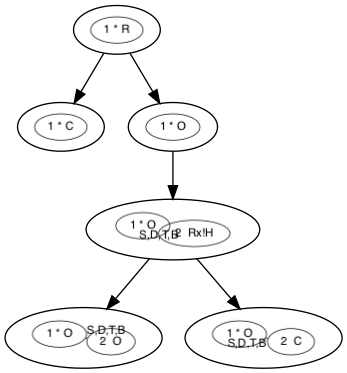

In [10]:
plot_tree(sidt,images=True)

In [11]:
train_error = [sidt.evaluate(d.mol) - d.value for d in train]
test_error = [sidt.evaluate(d.mol) - d.value for d in test]


In [12]:
np.mean(np.abs(np.array(train_error)))/4184.0

19.980057627234277

In [13]:
np.mean(np.abs(np.array(test_error)))/4184.0

22.17685756526987